<center><u><h1>Assignment 9:Transformer</center></u></h1>

###Table of content:
1. Encoder and Decoder
2. Attention Model Transformer


###Enoder and Decoder in NLP:
The best way to understand the concept of the encoder-decoder model is by running Pictionary. The rules of the game are very simple, the player chooses 1 word from a list randomly and needs to draw the meaning in the drawing. The role of the second player on the team is to analyze the drawing and select the word it describes. In this example we have three important elements, player 1 (the person who turns the word into a drawing), the drawing (the rabbit) and the person who guesses the word represented by the drawing (player 2). That's all we need to understand the encoder-decoder model, below we'll build a comparison between the game Pictionary and the encoder-decoder model for Spanish to English translation.

![](https://miro.medium.com/max/700/1*tdM9YctiX43_9CluSK_aJw.jpeg)

We translate the above graph into machine learning concepts, we would see the below one.

![](https://miro.medium.com/max/700/1*bjSD5iFeP5vbSzQ0MuAf5w.jpeg)




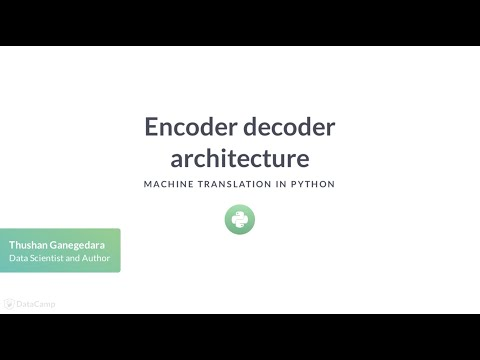

In [ ]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('DDYpp1Pu-zE', width=600, height=300)

###1.Encoder
Encoding means to convert data into a required format. In the Pictionary example we convert a word (text) into a drawing (image). In the machine learning context, we convert a sequence of words in Spanish into a two-dimensional vector, this two-dimensional vector is also known as hidden state. The encoder is built by stacking recurrent neural network. We use this type of layer because its structure allows the model to understand context and temporal dependencies of the sequences. The output of the encoder, the hidden state, is the state of the last RNN timestep.

![](https://miro.medium.com/max/478/1*pQwlJ5c2XOLGg0_-KUJ3MQ.jpeg)

###2.Hidden State
The output of the encoder, a two-dimensional vector that encapsulates the whole meaning of the input sequence. The length of the vector depends on the number of cells in the RNN.

![](https://miro.medium.com/max/564/1*0gZrsfivjJJKyg8EQWBEHA.jpeg)

###3.Decoder
To decode means to convert a coded message into intelligible language. The second person in the team playing Pictionary will convert the drawing into a word. In the machine learning model, the role of the decoder will be to convert the two-dimensional vector into the output sequence, the English sentence. It is also built with RNN layers and a dense layer to predict the English word.

![](https://miro.medium.com/max/700/1*rkgcxYFzLZjz7o6hz3FsQw.jpeg)

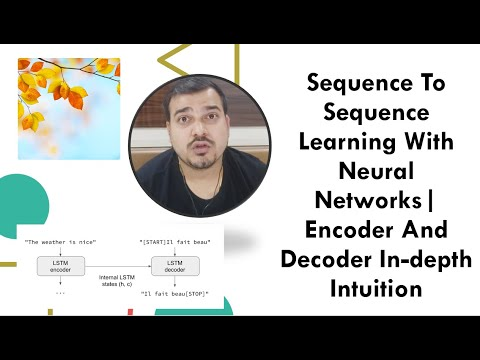

In [ ]:
###Refer Video
YouTubeVideo('jCrgzJlxTKg', width=600, height=300)

####Where we use an encoder decoder model?
1. Image Captioning

![](https://miro.medium.com/max/355/1*zLxeagxgdFn3hW_S1GCf6A.jpeg)

2. Sentiment Analysis

![](https://miro.medium.com/max/700/1*7NJRNQKzzLK5hD0HmtgnBQ.jpeg)

3. Translation

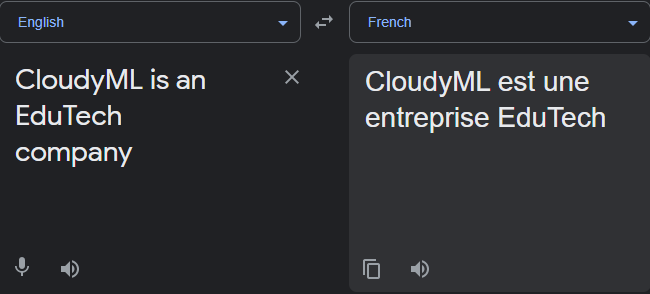


##Problems with Encoder and Decoder:


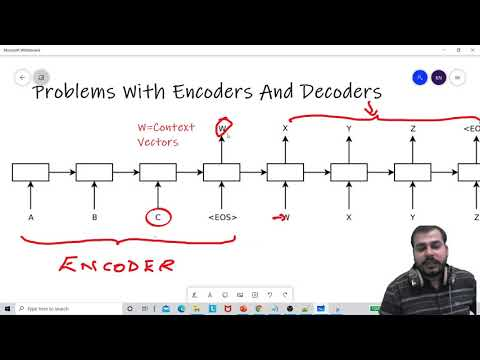

In [ ]:
###Refer Video
YouTubeVideo('tHf4CmTH1QE', width=600, height=300)

#The rise of the Transformer: Attention Is All You Need
In December 2017, Vaswani et al. published their seminal paper, Attention Is All You Need. They performed their work at Google Research and Google Brain. I will refer to the model described in Attention Is All You Need as the "original Transformer model".
In this section, we will look at the Transformer model they built from the outside. In the following sections, we will explore what is inside each component of the model.


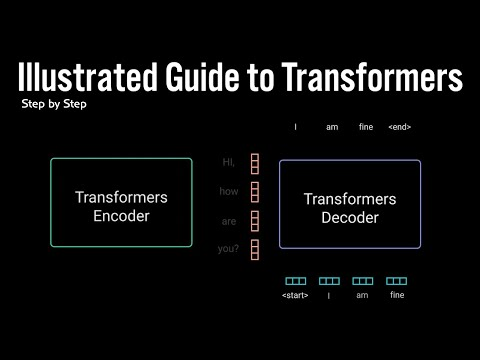

In [ ]:
###Refer Video
YouTubeVideo('4Bdc55j80l8', width=600, height=300)

####A Look at Transformer
In a translation, it would take a sentence in one language, and output its translation in another.

![](http://jalammar.github.io/images/t/the_transformer_3.png)


####Futher dividing into Encoder and Decoder
![](http://jalammar.github.io/images/t/The_transformer_encoders_decoders.png)

The original Transformer model is a stack of 6 layers.<br>

The encoding component is a stack of encoders.The decoding component is a stack of decoders of the same number.

![](http://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png)

##Encoder
The original encoder layer structure remains the same for all of the N=6 layers of the Transformer model. Each layer contains two main sub-layers: a multi-headed attention mechanism and a fully connected position-wise feedforward network.

![](http://jalammar.github.io/images/t/Transformer_encoder.png)

The encoder’s inputs first flow through a self-attention layer – a layer that helps the encoder look at other words in the input sentence as it encodes a specific word.
The outputs of the self-attention layer are fed to a feed-forward neural network. The exact same feed-forward network is independently applied to each position.

The major components of the model, let’s start to look at the various vectors/tensors and how they flow between these components to turn the input of a trained model into an output.

![](http://jalammar.github.io/images/t/embeddings.png)

As is the case in NLP applications in general, we begin by turning each input word into a vector using an embedding

The embedding only happens in the bottom-most encoder. The abstraction that is common to all the encoders is that they receive a list of vectors each of the size 512.

![](http://jalammar.github.io/images/t/encoder_with_tensors.png)

After embedding the words in our input sequence, each of them flows through each of the two layers of the encoder.

###Self-Attention Mechanism
Let's understand the self-attention mechanism with an example. Consider the following sentence:
```
A dog ate the food because it was hungry
```
In the preceding sentence, the pronoun it could mean either dog or food. By reading thesentence, we can easily understand that the pronoun it implies the dog and not food. But how does our model understand that in the given sentence, the pronoun it implies the dog and not food? Here is where the self-attention mechanism helps us.<br>
In the given sentence, A dog ate the food because it was hungry, first, our model computes the representation of the word A, next it computes the representation of the word dog, then it computes the representation of the word ate, and so on. While computing the representation of each word, it relates each word to all other words in the sentence to understand more about the word.

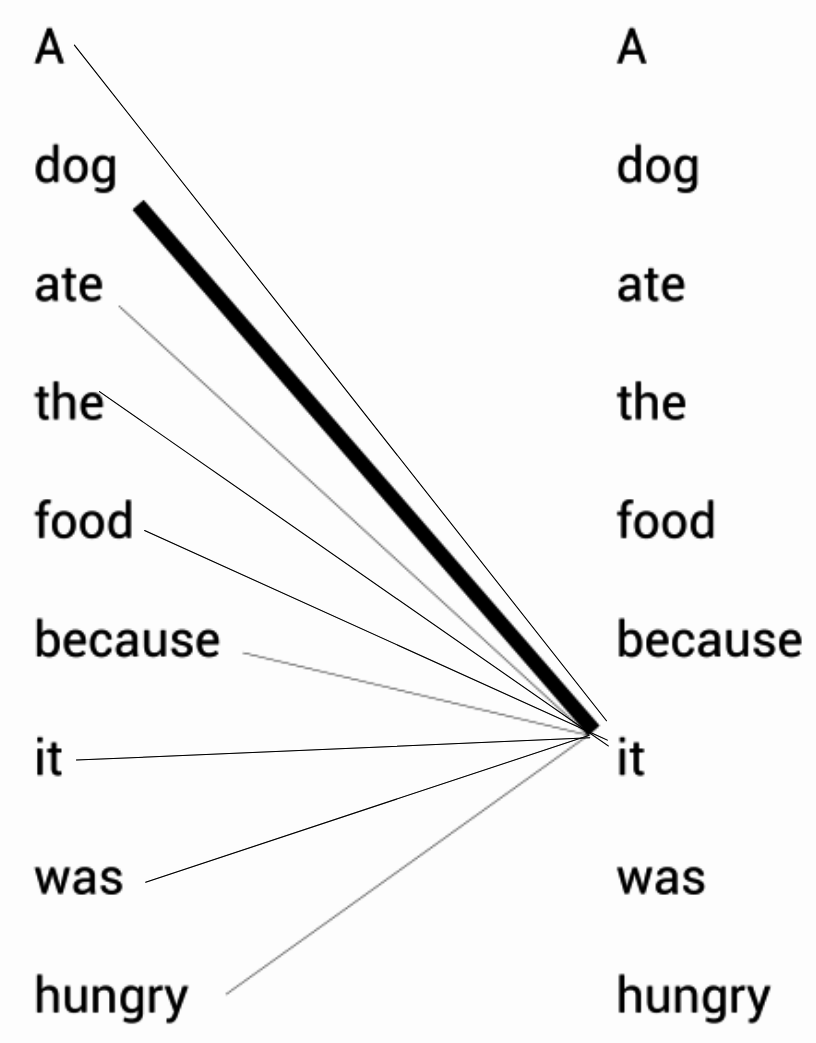




As shown in the following figure, in order to compute the representation of the word it, our
model relates the word it to all the words in the sentence. By relating the word it to all the
words in the sentence, our model can understand that the word it is related to the
word dog and not food. As we can observe, the line connecting the word it to dog is thicker
compared to the other lines, which indicates that the word it is related to the word dog and
not food in the given sentence
<br>
<br>

Okay, but how exactly does this work? Now that we have a basic idea of what the selfattention
mechanism is, let's understand more about it in detail.

Suppose our input sentence (source sentence) is I am good. First, we get the embeddings for
each word in our sentence. Note that the embeddings are just the vector representation of
the word and the values of the embeddings will be learned during training.
we can represent our input sentence I am good using the input matrix (embedding
matrix or input embedding) as shown here:
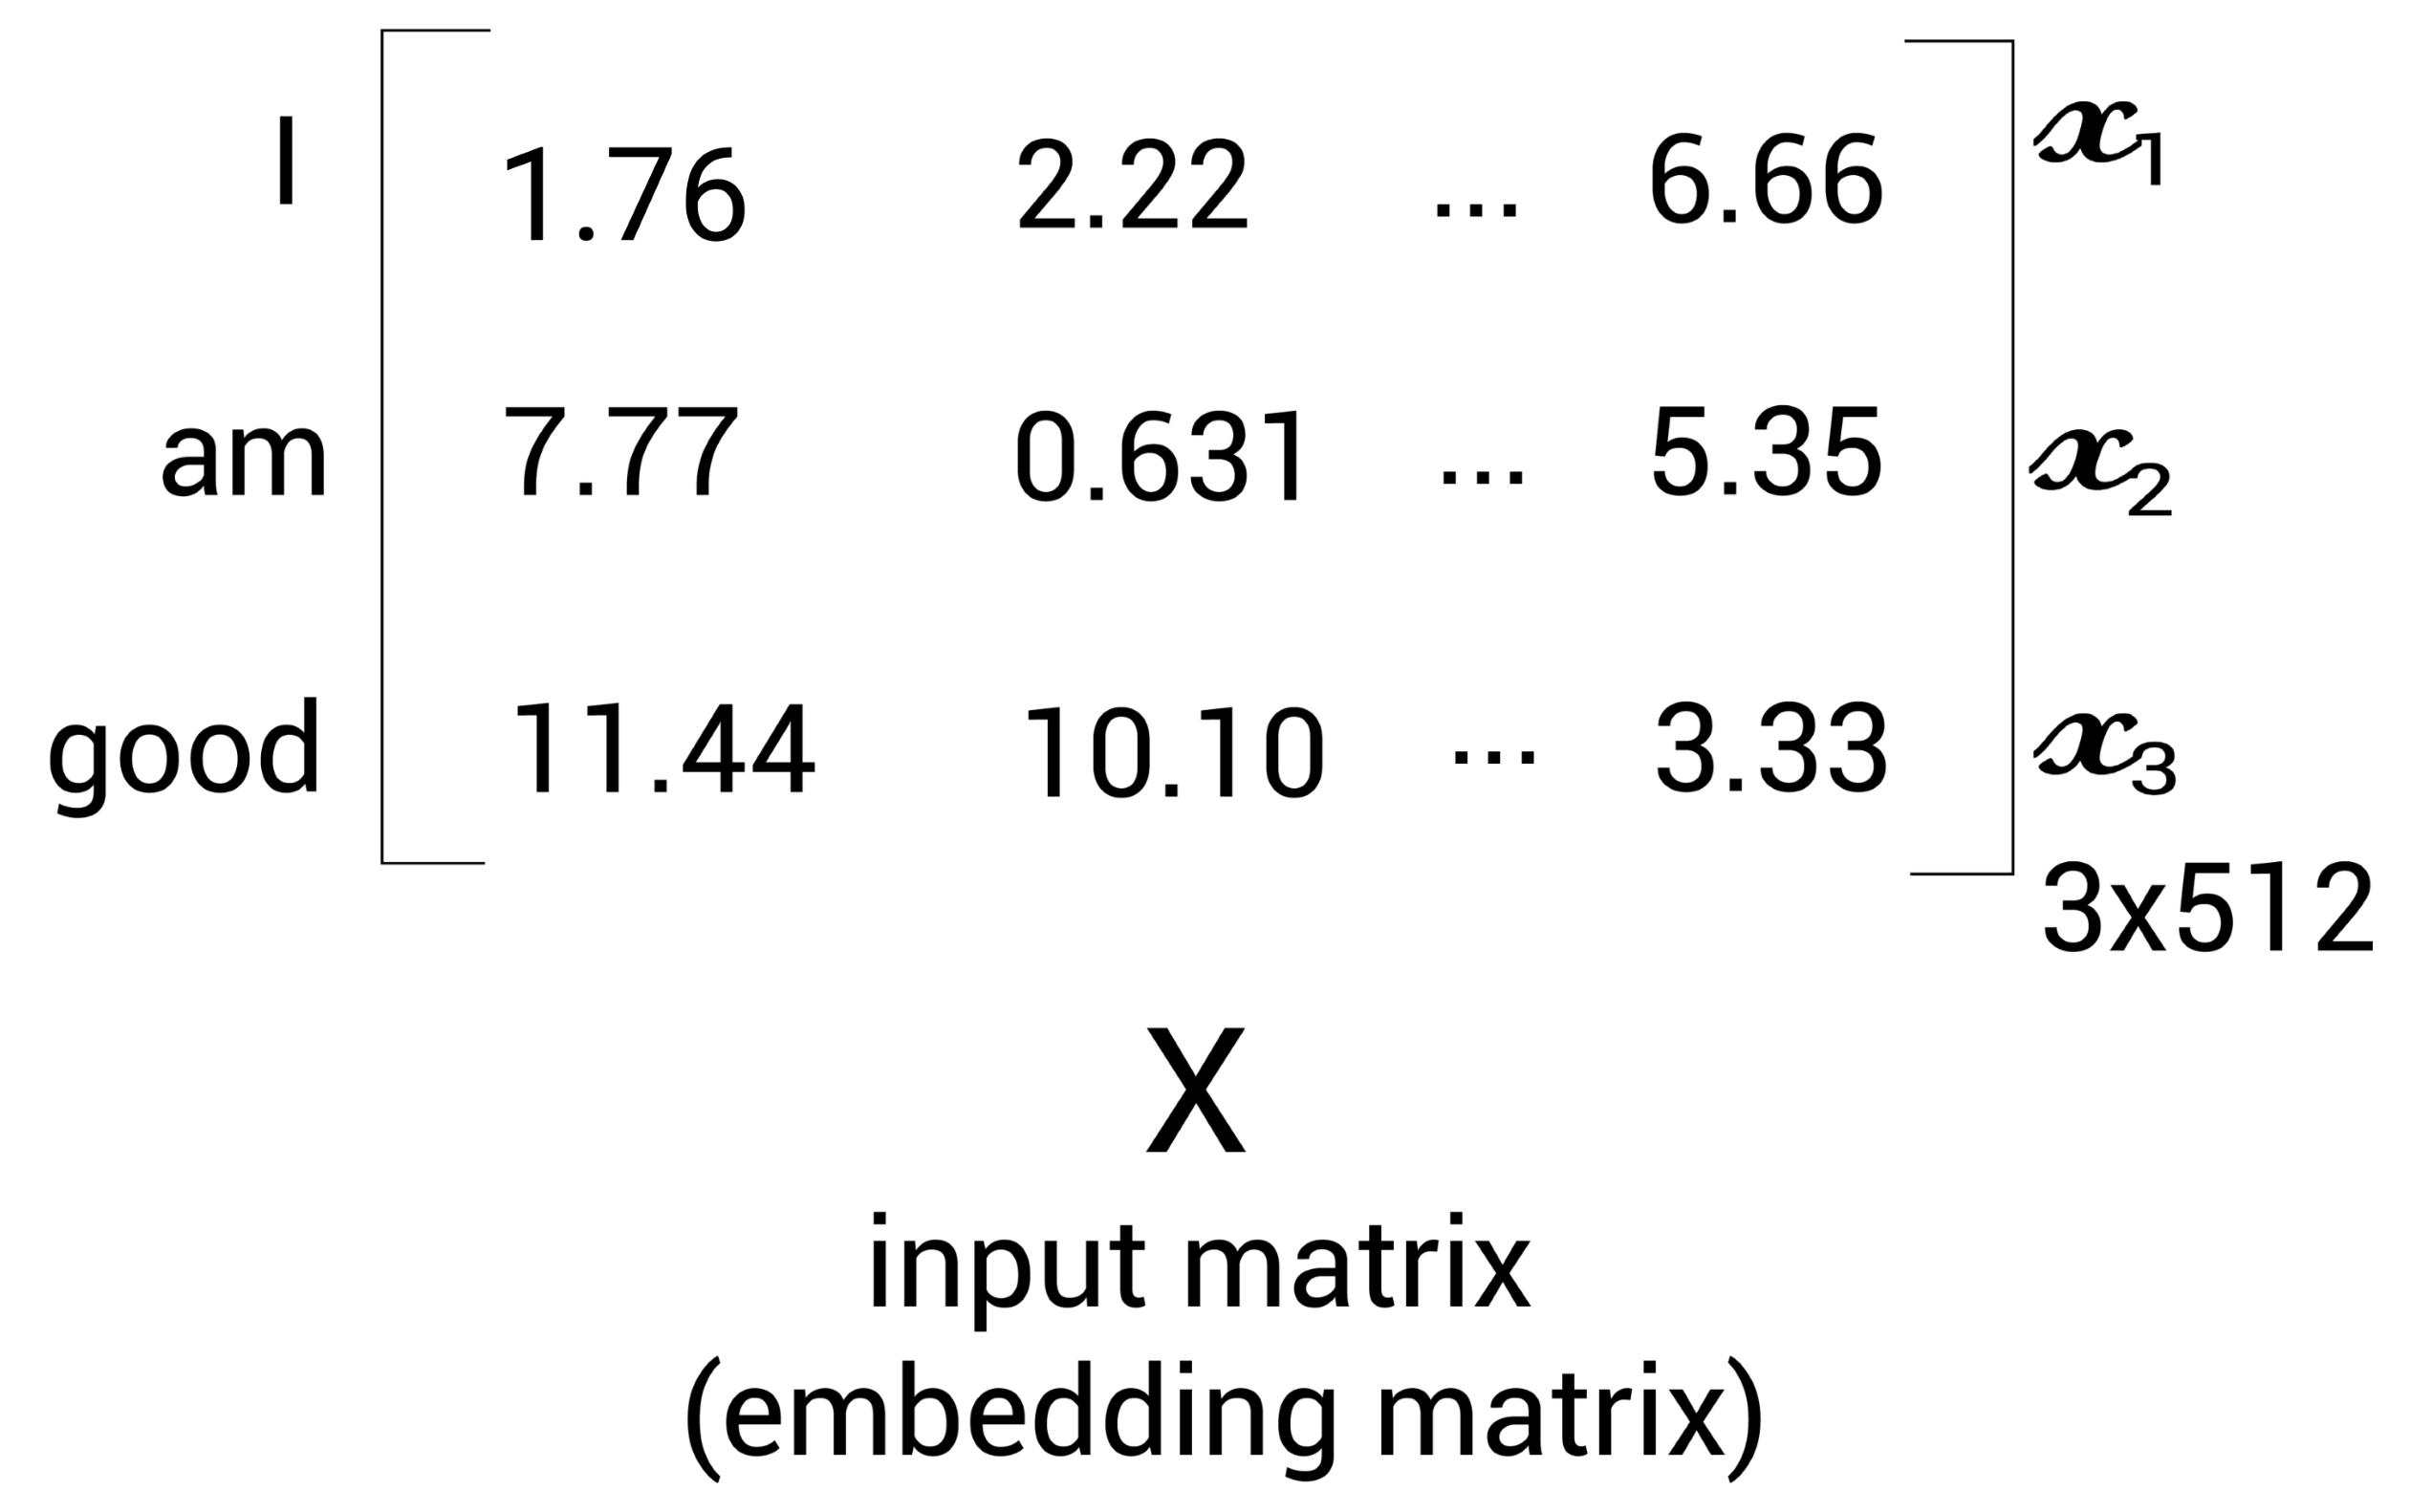

Thus, the dimension of the input matrix will be [sentence length x embedding dimension].
<br>
The number of words in our sentence (sentence length) is 3. Let the embedding dimension be 512; then, our input matrix(input embedding) dimension will be [3 x 512].

Now, from the input matrix, , we create three new matrices: a query matrix, , key matrix, , and value matrix, . Wait. What are these three new matrices? And why do we need them? They are used in the self-attention mechanism. We will see how exactly these three matrices are used in a while.
<br>
Okay, how we can create the query, key, and value matrices? To create these, we introduce three new weight matrices, called WQ,Wk and Wv. We create the query Q,key K and value V matrices by multiplying the input matrix X by WQ, WK,Wv respectively.
Note that the weight matrices WQ, WK,Wv are randomly initialized and their optimal values will be learned during training. As we learn the optimal weights, we will obtain more accurate query, key, and value matrices.

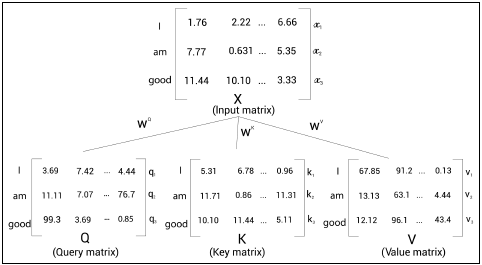


From the preceding figure, we can understand the following:
1. The first row in the query, key, and value matrices q1,k1 and v1 implies the
query, key, and value vectors of the word I.
2. The second row in the query, key, and value matrices q2,k2 and v2 implies
the query, key, and value vectors of the word am.
3. The third row in the query, key, and value matrices q3,k3 and v3 implies the
query, key, and value vectors of the word good.

Let’s first look at how to calculate self-attention using vectors, then proceed to look at how it’s actually implemented using matrices.

The **first step** in calculating self-attention is to create three vectors from each of the encoder’s input vectors. So for each word, we create a Query vector, a Key vector, and a Value vector. These vectors are created by multiplying the embedding by three matrices that we trained during the training process.

Notice that these new vectors are smaller in dimension than the embedding vector. Their dimensionality is 64, while the embedding and encoder input/output vectors have dimensionality of 512.
![](http://jalammar.github.io/images/t/transformer_self_attention_vectors.png)
Multiplying x1 by the WQ weight matrix produces q1, the "query" vector associated with that word. We end up creating a "query", a "key", and a "value" projection of each word in the input sentence.
<br>
The **second step** in calculating self-attention is to calculate a score. Say we’re calculating the self-attention for the first word in this example, “Thinking”. We need to score each word of the input sentence against this word. The score determines how much focus to place on other parts of the input sentence as we encode a word at a certain position.

The score is calculated by taking the dot product of the query vector with the key vector of the respective word we’re scoring. So if we’re processing the self-attention for the word in position #1, the first score would be the dot product of q1 and k1. The second score would be the dot product of q1 and k2.

![](http://jalammar.github.io/images/t/transformer_self_attention_score.png)

The **third and fourth** steps are to divide the scores by 8 (the square root of the dimension of the key vectors used in the paper – 64. This leads to having more stable gradients. There could be other possible values here, but this is the default), then pass the result through a softmax operation. Softmax normalizes the scores so they’re all positive and add up to 1.

![](http://jalammar.github.io/images/t/self-attention_softmax.png)

The **fifth** step is to multiply each value vector by the softmax score. The intuition here is to keep intact the values of the word we want to focus on, and drown-out irrelevant words.
The **sixth** step is to sum up the weighted value vectors. This produces the output of the self-attention layer at this position (for the first word).

![](http://jalammar.github.io/images/t/self-attention-output.png)

That concludes the self-attention calculation. The resulting vector is one we can send along to the feed-forward neural network. In the actual implementation, however, this calculation is done in matrix form for faster processing. So let’s look at that now that we’ve seen the intuition of the calculation on the word level.

Matrix Calculation of Self-Attention<br>
The first step is to calculate the Query, Key, and Value matrices. We do that by packing our embeddings into a matrix X, and multiplying it by the weight matrices we’ve trained (WQ, WK, WV).

![](http://jalammar.github.io/images/t/self-attention-matrix-calculation.png)

<br>
Finally, since we’re dealing with matrices, we can condense steps two through six in one formula to calculate the outputs of the self-attention layer.

![](http://jalammar.github.io/images/t/self-attention-matrix-calculation-2.png)

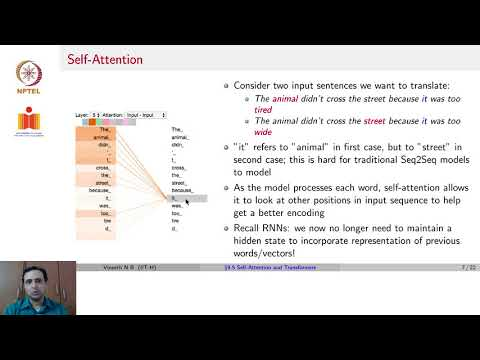

In [ ]:
###Refer Video
YouTubeVideo('phOc25QfNS0', width=600, height=300)

###Multi-head attention
his improves the performance of the attention layer in two ways:

1. It expands the model’s ability to focus on different positions. Yes, in the example above, z1 contains a little bit of every other encoding, but it could be dominated by the the actual word itself. It would be useful if we’re translating a sentence like “The animal didn’t cross the street because it was too tired”, we would want to know which word “it” refers to.

2. It gives the attention layer multiple “representation subspaces”. As we’ll see next, with multi-headed attention we have not only one, but multiple sets of Query/Key/Value weight matrices (the Transformer uses eight attention heads, so we end up with eight sets for each encoder/decoder). Each of these sets is randomly initialized. Then, after training, each set is used to project the input embeddings (or vectors from lower encoders/decoders) into a different representation subspace.

![](http://jalammar.github.io/images/t/transformer_attention_heads_qkv.png)

If we do the same self-attention calculation we outlined above, just eight different times with different weight matrices, we end up with eight different Z matrices.

![](http://jalammar.github.io/images/t/transformer_attention_heads_z.png)

This leaves us with a bit of a challenge. The feed-forward layer is not expecting eight matrices – it’s expecting a single matrix (a vector for each word). So we need a way to condense these eight down into a single matrix.

![](http://jalammar.github.io/images/t/transformer_attention_heads_weight_matrix_o.png)

It’s quite a handful of matrices, I realize. Let me try to put them all in one visual so we can look at them in one place.
![](http://jalammar.github.io/images/t/transformer_multi-headed_self-attention-recap.png)


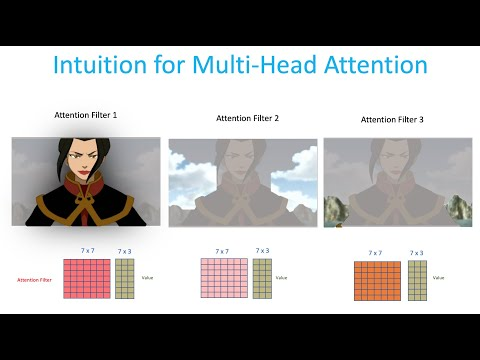

In [ ]:
###Refer Video
YouTubeVideo('mMa2PmYJlCo', width=600, height=300)

Attention will run dot products between word vectors and determine the strongest
relationships of a word among all the other words, including itself ("cat" and "cat").<br>
The attention mechanism will provide a deeper relationship between words and
produce better results.<br>
For each attention sub-layer, the original Transformer model runs not one but eight attention mechanisms in parallel to speed up the calculations.



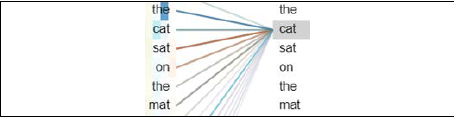

#Positional encoding
We enter this positional encoding function of the Transformer with no idea of the position of a word in a sequence:

![](http://jalammar.github.io/images/t/transformer_positional_encoding_vectors.png)

The transformer adds a vector to each input embedding. These vectors follow a specific pattern that the model learns, which helps it determine the position of each word, or the distance between different words in the sequence. The intuition here is that adding these values to the embeddings provides meaningful distances between the embedding vectors once they’re projected into Q/K/V vectors and during dot-product attention.

If the embedding has a dimensionality of 4, the orginal positional encodings be:

![](http://jalammar.github.io/images/t/transformer_positional_encoding_example.png)



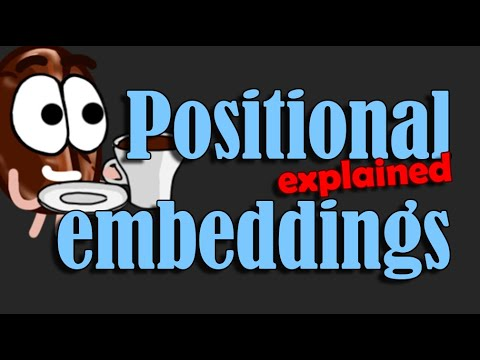

In [ ]:
###Refer Video
YouTubeVideo('1biZfFLPRSY', width=600, height=300)

# Residuals
One detail in the architecture of the encoder that we need to mention before moving on, is that each sub-layer (self-attention, ffnn) in each encoder has a residual connection around it, and is followed by a layer-normalization step.
![](http://jalammar.github.io/images/t/transformer_resideual_layer_norm.png)

If we’re to visualize the vectors and the layer-norm operation associated with self attention, it would look like this:

![](http://jalammar.github.io/images/t/transformer_resideual_layer_norm_2.png)

The sub-layers of the decoder as well. If we’re to think of a Transformer of 2 stacked encoders and decoders, it would look something like this:

![](http://jalammar.github.io/images/t/transformer_resideual_layer_norm_3.png)

#Decoder Side:
The structure of the decoder layer remains the same as the encoder for all the N=6 layers of the Transformer model. Each layer contains three sub-layers: a multiheaded masked attention mechanism, a multi-headed attention mechanism, and a fully connected position-wise feedforward network.<br>
The decoder has a third main sub-layer, which is the masked multi-head attention
mechanism. In this sub-layer output, at a given position, the following words are masked so that the Transformer bases its assumptions on its inferences without seeing the rest of the sequence. That way, in this model, it cannot see future parts of the sequence.<br>

The encoder start by processing the input sequence. The output of the top encoder is then transformed into a set of attention vectors K and V. These are to be used by each decoder in its “encoder-decoder attention” layer which helps the decoder focus on appropriate places in the input sequence:
![](http://jalammar.github.io/images/t/transformer_decoding_1.gif)

The following steps repeat the process until a special symbol is reached indicating the transformer decoder has completed its output. The output of each step is fed to the bottom decoder in the next time step, and the decoders bubble up their decoding results just like the encoders did.
![](http://jalammar.github.io/images/t/transformer_decoding_2.gif)

The self attention layers in the decoder operate in a slightly different way than the one in the encoder:

The “Encoder-Decoder Attention” layer works just like multiheaded self-attention, except it creates its Queries matrix from the layer below it, and takes the Keys and Values matrix from the output of the encoder stack.

#Final Linear and Softmax Layer:
The Linear layer is a simple fully connected neural network that projects the vector produced by the stack of decoders, into a much, much larger vector called a logits vector.
<br>
<br>
The softmax layer then turns those scores into probabilities (all positive, all add up to 1.0). The cell with the highest probability is chosen, and the word associated with it is produced as the output for this time step.


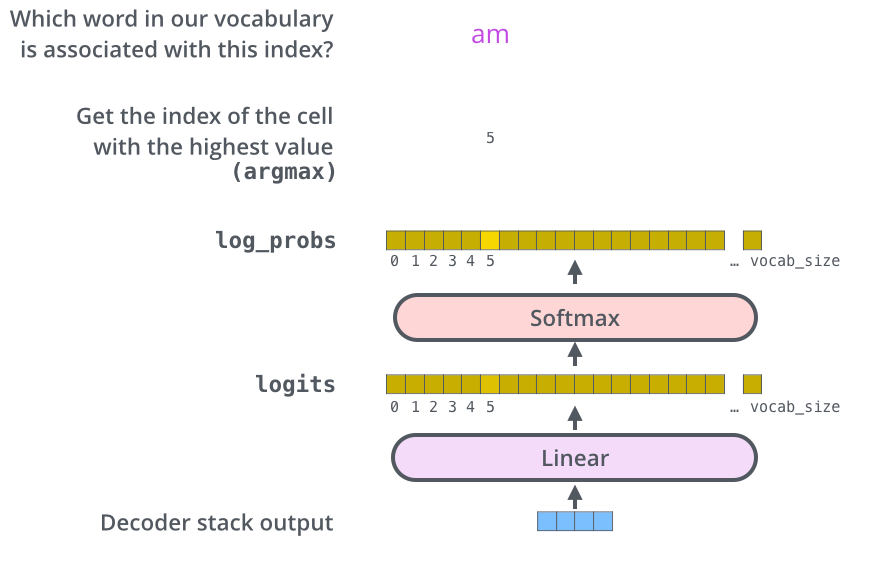

This figure starts from the bottom with the vector produced as the output of the decoder stack. It is then turned into an output word.




#Hugging Face

Hugging Face has a large open-source community, with Transformers library among its top attractions. Transformers Library is backed by deep learning libraries– PyTorch and TensorFlow. It provides thousands of pretrained models to perform text classification, information retrieval, question and answer, translation, text generation, and summarisation. Transformers provide APIs that can be quickly downloaded and use pretrained models on a text to fine-tune users’ datasets. <br>
The startup is putting efforts into growing the open-source community for the development of language models. The company said there is a disconnect between the research and the engineering teams in NLP. Big tech companies do not completely embrace the open-source approach, and even in a few cases where they have, the open-sourced repositories are hard to use and not well-maintained.

Hugging Face aims to become GitHub for machine learning. Hugging Face is one of the leading startups in the NLP space. Big tech companies such as Apple, Monzo, and Bing use its library in production.

Blog: https://huggingface.co/



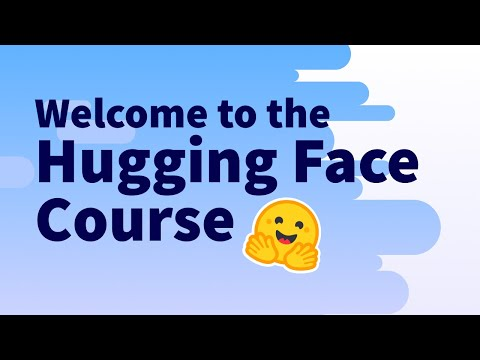

In [ ]:
###Refer Video
YouTubeVideo('00GKzGyWFEs', width=600, height=300)

##Transformers Pipeline
Pipelines are the abstraction for the complex code behind the transformers library; It is easiest to use the pre-trained models for inference. It provides easy-to-use pipeline functions for a variety of tasks, including but not limited to, Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction, and Question Answering.
<br>

<br>
For the machine learning/deep learning experiment, we need to preprocess the data, train the model and write an inference script; in contrast with Pipeline functions, we need to import it and pass our raw data. The Pipeline will preprocess our data in the backend, including tokenization and padding and all the relevant processing steps for the algorithm’s input, and return the output with just a call to it.

Refer:https://github.com/huggingface/transformers#quick-tour-of-pipelines

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


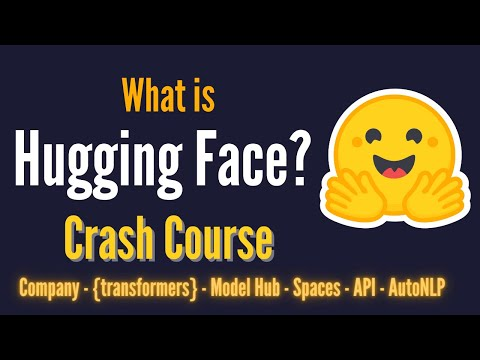

In [ ]:
###Refer Video
YouTubeVideo('x8gdOPO35HA', width=600, height=300)

We need to install the Transformers library to use these fantastic pipeline functions.

Install the library using pip transformers
---


In [1]:
#install transformers using pip
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.9 MB/s eta 0:00:00


Let’s unwrap the magic box and see how it surprise us.
First import the Pipeline from transformers library :)

Refer:https://huggingface.co/docs/transformers/main_classes/pipelines

In [2]:
#import pipeline from transformers
from transformers import pipeline

Sentiment Analysis
<br>
Sentiment analysis is used to predict the sentiment of the text, whether the text is positive or negative. <br>
To perform sentiment analysis using Pipeline, we need to initialize the Pipeline with the ‘sentiment-analysis’ task as follows.

In [3]:
#initialize pipeline with sentiment analysis
sent_analysis=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
#input a sentence to perform sentiment analysis.
test= 'CloudyML is very Nice EduTech Company'
#print the result
print(sent_analysis(test))

[{'label': 'POSITIVE', 'score': 0.9994739890098572}]


Now we import **matplotlib** for visualize the data and **pandas** to import the dataset or analysis of data.

In [5]:
#Importing matplotlib library to plot pie chart.
import matplotlib.pyplot as plt
#importing pandas library
import pandas as pd

After importing the libraries we load the data by using pandas.

In [7]:
#Loading the data to the variable
df=pd.read_csv('/content/Restaurant_Reviews.tsv',delimiter='\t')

We print the dataset with help of head function.

In [8]:
#partial view of dataset from top
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In the next part, we segregate the data based on the positive and negative labels. Text with positive label is stored in 'pos' variable and text with negative label is stored in 'neg' variable.

In [9]:
#finding the positive and negative text in Data
pos=df[df['Liked']==1]
neg=df[df['Liked']==0]
print("Positive Text \n",pos.head())
print("\nNegative Text \n",neg.head())


Positive Text 
                                               Review  Liked
0                           Wow... Loved this place.      1
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
8                          The fries were great too.      1
9                                     A great touch.      1

Negative Text 
                                               Review  Liked
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
5     Now I am getting angry and I want my damn pho.      0
6              Honeslty it didn't taste THAT fresh.)      0
7  The potatoes were like rubber and you could te...      0


Now we will check Null values present in the dataset. Null values effect the model accuary.<br>
So we are checking for the null values in dataset.

In [10]:
#checking the for null values
df.isnull().sum()

Review    0
Liked     0
dtype: int64

Here we can see that we have both postive and negative text in the data or dataset. So we can visulize the data by using matplotlib.



Now we plot a pie chart of the positive and negative data to understand the ratio of the data. Matplotlib library is used to plot the pie chart using various parameters. <br> Do refer to the given documentation to know more about the used parameters: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html


Text(0.5, 1.0, 'Positive vs Negative')

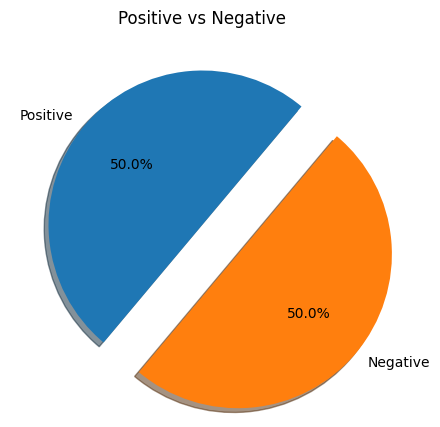

In [11]:
#Plotting the Postive vs Negative in piechart.
fig=plt.figure(figsize=(5,5))
temp=[pos['Liked'].count(),neg['Liked'].count()]
plt.pie(temp,labels=['Positive','Negative'],autopct='%2.1f%%',shadow=True,startangle=50,explode=(0,0.3))
plt.title('Positive vs Negative')

After visualization we will print the first 5 reviews for sentiment analysis.

In [12]:
#print first 5 reviews for sentiment analysis
df['Review'][0:6]

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
Name: Review, dtype: object

We can see that the percentage of positive and negative data is equal i.e. 50% each. So we will apply sentiment analysis to first 5 reviews of the dataset.

In [13]:
#initialize a variable to 0
c=0
#run a for loop iterating through review column
for i in df['Review']:
  #check if the variable is less than equal to 5
  if c<=5:
    #apply the sentiment analysis function to current review
    print(sent_analysis(i))
    #increment the variable
    c=c+1
  #else break
  else:
    break


[{'label': 'POSITIVE', 'score': 0.9998804330825806}]
[{'label': 'NEGATIVE', 'score': 0.9997690320014954}]
[{'label': 'NEGATIVE', 'score': 0.9996275901794434}]
[{'label': 'POSITIVE', 'score': 0.9995303153991699}]
[{'label': 'POSITIVE', 'score': 0.9996086955070496}]
[{'label': 'NEGATIVE', 'score': 0.992295503616333}]


You try with your nos of input.For understanding we have taken 5 you can change the inputs :-)

We can easily use other pipelines, including text summarization, named entity recognition, language translation, and many more. With this powerful transformers functionality, we can create excellent applications without even going into the coding ground. One of the advantages of using these pre-trained models is that we don’t have to train our models from scratch, which sometimes takes days to prepare on a large volume of data, reducing our resource consumption and ultimately reducing our running cost.

##TASK:<br>
Text Summarization using Hugging Face Transformer,
Hugging Face Transformer uses the Abstractive Summarization approach where the model develops new sentences in a new form, exactly like people do, and produces a whole distinct text that is shorter than the original.

You need to build text summarizarion model with the help of above reference code[Sentiment analysis code] and try to built  it -__-

Hint: Initialize the HuggingFace summarization pipeline("summarization")


In [14]:
#import pipeline from transformers
from transformers import pipeline

In [15]:
# using pipeline  for summarization task
summarization=pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [16]:
#here we have given the input passage,You change the input as per your needs:)
text = """
Paul Walker is hardly the first actor to die during a production.
But Walker's death in November 2013 at the age of 40 after a car crash was especially eerie given his rise to fame in the "Fast and Furious" film franchise.
The release of "Furious 7" on Friday offers the opportunity for fans to remember -- and possibly grieve again -- the man that so many have praised as one of the nicest guys in Hollywood.
"He was a person of humility, integrity, and compassion," military veteran Kyle Upham said in an email to CNN.
Walker secretly paid for the engagement ring Upham shopped for with his bride.
"We didn't know him personally but this was apparent in the short time we spent with him.
I know that we will never forget him and he will always be someone very special to us," said Upham.
The actor was on break from filming "Furious 7" at the time of the fiery accident, which also claimed the life of the car's driver, Roger Rodas.
Producers said early on that they would not kill off Walker's character, Brian O'Connor, a former cop turned road racer. Instead, the script was rewritten and special effects were used to finish scenes, with Walker's brothers, Cody and Caleb, serving as body doubles.
There are scenes that will resonate with the audience -- including the ending, in which the filmmakers figured out a touching way to pay tribute to Walker while "retiring" his character. At the premiere Wednesday night in Hollywood, Walker's co-star and close friend Vin Diesel gave a tearful speech before the screening, saying "This movie is more than a movie." "You'll feel it when you see it," Diesel said. "There's something emotional that happens to you, where you walk out of this movie and you appreciate everyone you love because you just never know when the last day is you're gonna see them." There have been multiple tributes to Walker leading up to the release. Diesel revealed in an interview with the "Today" show that he had named his newborn daughter after Walker.
Social media has also been paying homage to the late actor. A week after Walker's death, about 5,000 people attended an outdoor memorial to him in Los Angeles. Most had never met him. Marcus Coleman told CNN he spent almost $1,000 to truck in a banner from Bakersfield for people to sign at the memorial. "It's like losing a friend or a really close family member ... even though he is an actor and we never really met face to face," Coleman said. "Sitting there, bringing his movies into your house or watching on TV, it's like getting to know somebody. It really, really hurts." Walker's younger brother Cody told People magazine that he was initially nervous about how "Furious 7" would turn out, but he is happy with the film. "It's bittersweet, but I think Paul would be proud," he said. CNN's Paul Vercammen contributed to this report.
"""

In [17]:
#apply the summarization function to paragraph
summary_text=summarization(text)
print("summary :",summary_text)

summary : [{'summary_text': ' Paul Walker died in November 2013 after a car crash in Los Angeles . The late actor was one of the nicest guys in Hollywood . The release of "Furious 7" on Friday offers a chance to grieve again . There have been multiple tributes to Walker leading up to the film\'s release .'}]


Great job!! You have come to the end of this assignment. Treat yourself for this :))

![](https://media4.giphy.com/media/xT9DPCJ1uw5uf56sGA/200.gif)


<br>

# Do fill this [feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s)
<br>
You may head on to the next assignment.